# Task 1: Feature Preparation

In [ ]:
!pip install -U sentence-transformers

In [ ]:
import numpy as np
import pandas as pd
import glob
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
path1 = "/content/drive/MyDrive/Project/Datasets/*.csv"
print(path1)
file_list = glob.glob(path1)
print(file_list)

csv_files = []
for fil in file_list:
  csv_files += glob.glob(fil)

print(csv_files)

/content/drive/MyDrive/Project/Datasets/*.csv
['/content/drive/MyDrive/Project/Datasets/ManUtd_task2.csv', '/content/drive/MyDrive/Project/Datasets/LilTunechi_task2.csv', '/content/drive/MyDrive/Project/Datasets/NewYorker_task2.csv', '/content/drive/MyDrive/Project/Datasets/Twitch_task2.csv', '/content/drive/MyDrive/Project/Datasets/Forbes_task2.csv', '/content/drive/MyDrive/Project/Datasets/ricky_martin_task2.csv']
['/content/drive/MyDrive/Project/Datasets/ManUtd_task2.csv', '/content/drive/MyDrive/Project/Datasets/LilTunechi_task2.csv', '/content/drive/MyDrive/Project/Datasets/NewYorker_task2.csv', '/content/drive/MyDrive/Project/Datasets/Twitch_task2.csv', '/content/drive/MyDrive/Project/Datasets/Forbes_task2.csv', '/content/drive/MyDrive/Project/Datasets/ricky_martin_task2.csv']


In [ ]:
csv_files_data = []
csv_label_name = []
csv_label_length = []
for i in csv_files:
  a = pd.read_csv(i, header=None)
  csv_files_data.append(a)
  csv_label_name.append(i.split("/")[6].split("_")[0])
  csv_label_length.append(len(a))
  print(a.head())
csv_files_data

data_df = pd.concat(csv_files_data)
data_df.head()

                                                   0
0   see where the young reds will be travelling a...
1  sending good vibes to ahead of our big clash w...
2      a first united player of the month award for 
3  eight iconic momentsone winnerfeaturing haircu...
4  our newest fan channel is live join our for si...
                                                   0
0                                         go pack go
1  tf wrong w me playin w like dat idk buthow bou...
2                                         go pack go
3                            happy birthday ms linda
4  jets beat the bills dat man carton bout to be ...
                                                   0
0  newyorkerhumor nancy pelosi might ending tenur...
1  joseph conrad born day  novel heart darkness c...
2  qatari world cup born corruption paid hydrocar...
3  its kind like housing market la trying cast mo...
4  us  children lost parent caregiver covid curre...
                                              

,0
0,see where the young reds will be travelling a...
1,sending good vibes to ahead of our big clash w...
2,a first united player of the month award for
3,eight iconic momentsone winnerfeaturing haircu...
4,our newest fan channel is live join our for si...


In [ ]:
# creating separate lists for the y-labels for all data points
csv_label_name[5] = "ricky_martin"

labels = np.array([])
index  = 0
for i in range(len(csv_label_length)):
  name = []
  for j in range(csv_label_length[i]):
    name.append(csv_label_name[i])
  labels= np.append(labels,np.array(name))

print(labels)
print(labels.shape)

['ManUtd' 'ManUtd' 'ManUtd' ... 'ricky_martin' 'ricky_martin'
 'ricky_martin']
(5722,)


In [ ]:
data_df['Label'] = labels
data_df.head()

,0,Label
0,see where the young reds will be travelling a...,ManUtd
1,sending good vibes to ahead of our big clash w...,ManUtd
2,a first united player of the month award for,ManUtd
3,eight iconic momentsone winnerfeaturing haircu...,ManUtd
4,our newest fan channel is live join our for si...,ManUtd


In [ ]:
# remove NaN values
data_df = data_df.dropna()
np.unique(data_df.isnull().values)

array([False])

In [ ]:
# train-test split. 75/25 split -> for bow
train_X, test_X, train_y, test_y = train_test_split(data_df, data_df['Label'], test_size=0.25, shuffle = True) #split data set. 
train_X = train_X.drop('Label', axis=1)
test_X = test_X.drop('Label',axis=1)
print(data_df.shape)
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)

(5714, 2)
(4285, 1)
(4285,)
(1429, 1)


In [ ]:
def get_vocab(arr):
  vocab = {}
  for i in arr:
    words = str(i).split(" ")
    for word in words:
      if word not in vocab.keys() and word!="":
        vocab[word] = 1
      elif word in vocab.keys():
        vocab[word] += 1
  return vocab

In [ ]:
tweets = train_X.iloc[:,0].tolist()
vocabulary = get_vocab(tweets)
len(vocabulary)

11949

In [ ]:
vocabulary

{'this': 182,
 'redfall': 1,
 'looks': 12,
 'great': 54,
 'cant': 31,
 'wait': 34,
 'to': 637,
 'see': 121,
 'morb': 1,
 'xboxbethesda': 6,
 'first': 116,
 'time': 158,
 'major': 12,
 'sports': 31,
 'team': 46,
 'united': 104,
 'states': 26,
 'women': 41,
 'running': 11,
 'entire': 10,
 'organizations': 3,
 'daytoday': 3,
 'operations': 4,
 'bernd': 2,
 'hilla': 2,
 'becher': 2,
 'among': 17,
 'influential': 2,
 'photographers': 7,
 'second': 17,
 'half': 20,
 'th': 29,
 'century': 9,
 'retrospective': 3,
 'work': 54,
 'soon': 24,
 'exhibit': 2,
 'san': 27,
 'francisco': 4,
 'museum': 10,
 'modern': 16,
 'art\n': 2,
 'actor': 4,
 'writer': 14,
 'emma': 7,
 'thompson': 7,
 'ways': 14,
 'dramatize': 1,
 'female': 8,
 'heroes': 10,
 'support': 39,
 'men': 14,
 'life': 45,
 'career': 24,
 'said': 67,
 'felt': 6,
 'viciously': 1,
 'angry': 1,
 'viscerally': 1,
 'enraged': 1,
 'belittling': 1,
 'sheesh': 1,
 'going': 50,
 'into': 45,
 'the': 1076,
 'new': 319,
 'dekade': 1,
 'in': 384,
 'car

In [ ]:
# creating embeddings representation of the dataset
model = SentenceTransformer('all-MiniLM-L6-v2')
sentences = train_X.iloc[:,0].tolist()
embeddings = model.encode(sentences)
embeddingsTest = model.encode(test_X.iloc[:,0].tolist())

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
embeddings.shape

(4285, 384)

# Task 2: KNNs

For embeddings as features:

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict

In [ ]:
# KNN 
# run 5-fold cross validation for k = 1 - 10 for both distance metrics. 
predEuc = []
for i in range (1,11):
  knnEuc = KNeighborsClassifier(n_neighbors=i, p = 2, metric = 'minkowski') #euclidean 
  predEuc.append(cross_val_predict(knnEuc, embeddings, train_y, cv=5)) #5 fold 

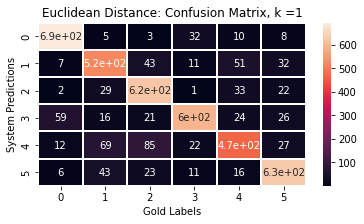

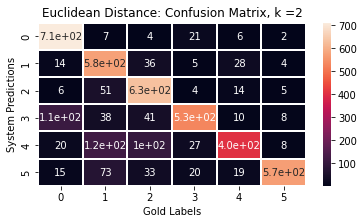

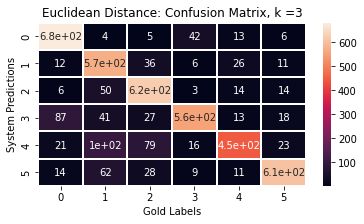

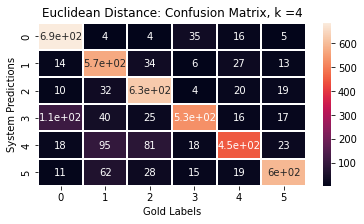

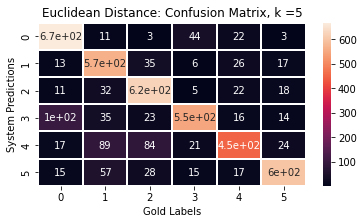

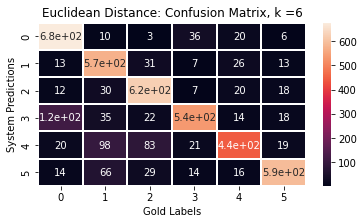

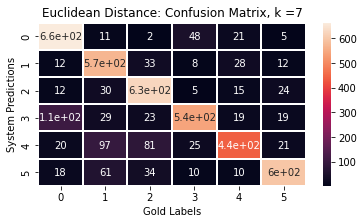

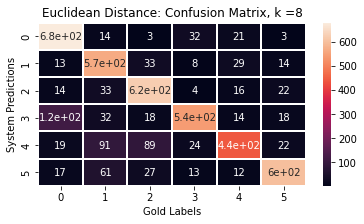

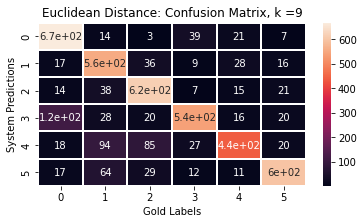

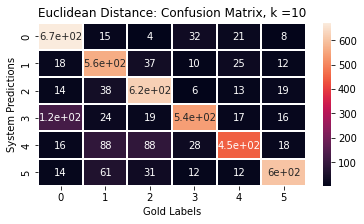

In [ ]:
# get the confusion matrix. 

for i in range(10):
  confusionE = confusion_matrix(train_y, predEuc[i]) 
  plt.figure(figsize=(6,3))
  heat_map = sns.heatmap(confusionE, linewidth = 1 , annot = True)
  st = "Euclidean Distance: Confusion Matrix, k =" +str(i+1)
  plt.title( st)
  plt.ylabel('System Predictions')
  plt.xlabel('Gold Labels')
  plt.show()

In [ ]:
#accuracy, macroF1
accs = []

class_report = []
for i in range(10):
  a = accuracy_score(train_y, predEuc[i])
  accs.append(a)
  print("For k = ", i+1)
  print("accuracy: " , a) 
  print(classification_report(train_y, predEuc[i]))

For k =  1
accuracy:  0.8252042007001167
              precision    recall  f1-score   support

      Forbes       0.89      0.92      0.91       751
  LilTunechi       0.76      0.78      0.77       664
      ManUtd       0.78      0.88      0.83       712
   NewYorker       0.89      0.80      0.84       741
      Twitch       0.78      0.69      0.73       686
ricky_martin       0.85      0.86      0.86       731

    accuracy                           0.83      4285
   macro avg       0.82      0.82      0.82      4285
weighted avg       0.83      0.83      0.82      4285

For k =  2
accuracy:  0.8002333722287048
              precision    recall  f1-score   support

      Forbes       0.81      0.95      0.87       751
  LilTunechi       0.66      0.87      0.75       664
      ManUtd       0.74      0.89      0.81       712
   NewYorker       0.87      0.72      0.79       741
      Twitch       0.84      0.59      0.69       686
ricky_martin       0.95      0.78      0.86       

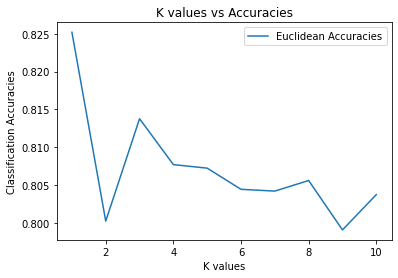

In [ ]:
# Classification Accuracies
# plotting euc points 
k_vals = list(range(1, 11))
plt.plot(k_vals, accs, label = "Euclidean Accuracies")
  
plt.xlabel('K values')
plt.ylabel('Classification Accuracies')
plt.title('K values vs Accuracies')
plt.legend()
plt.show()

# We haven chose the value of k = 3 for our classifier. Although k = 1 has a higher model accuracy, k=1 overfits to the training data and is not ideal to be used during classification.  

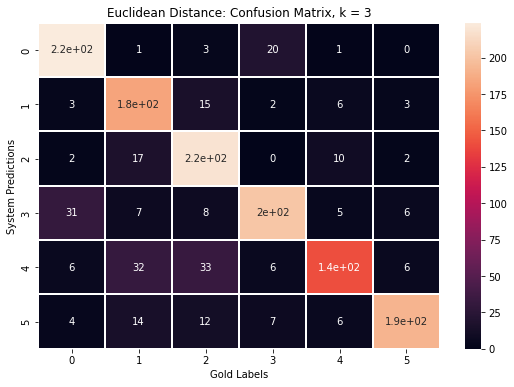

In [ ]:
# TESTING for k = 3
knnEuc = KNeighborsClassifier(n_neighbors=3, p = 2, metric = 'minkowski').fit(embeddings, train_y) #euclidean 
eucPred =knnEuc.predict(embeddingsTest)

confusionE = confusion_matrix(test_y, eucPred) 
confusionE
plt.figure(figsize=(9,6))
heat_map = sns.heatmap(confusionE, linewidth = 1 , annot = True)
st = "Euclidean Distance: Confusion Matrix, k = 3" 
plt.title( st)
plt.ylabel('System Predictions')
plt.xlabel('Gold Labels')
plt.show()


In [ ]:
print("Accuracy: ", accuracy_score(test_y, eucPred))
print(classification_report(test_y, eucPred))

Accuracy:  0.8124562631210637
              precision    recall  f1-score   support

      Forbes       0.83      0.90      0.86       249
  LilTunechi       0.72      0.86      0.79       212
      ManUtd       0.76      0.88      0.81       250
   NewYorker       0.85      0.78      0.81       259
      Twitch       0.83      0.63      0.72       224
ricky_martin       0.92      0.82      0.86       235

    accuracy                           0.81      1429
   macro avg       0.82      0.81      0.81      1429
weighted avg       0.82      0.81      0.81      1429



For text (bow) as features:

In [ ]:
print(train_X[0].head())

708                                          final push 
371    biotech companys goal plantbased american flag...
472    crime rates rise many americans asking safest ...
216    never mind they did davante right my kids are ...
630     nope not a dream partner confirmed irl congra...
Name: 0, dtype: object


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
# UPDATE: changed the code here a little bit to match the shape of X_train_tfidf & X_test_tfidf
count_vect = CountVectorizer(lowercase=False)
tfidf_transformer = TfidfTransformer(use_idf=True)

X_train_counts = count_vect.fit_transform(train_X[0])
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

X_test_counts = count_vect.transform(test_X[0])
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

(4285, 11567)
(1429, 11567)


In [ ]:
predEuc_text = []

k_vals = list(range(15, 25))

for i in k_vals:
  knnEuc = KNeighborsClassifier(n_neighbors=i, p = 2, metric = 'minkowski') #euclidean 
  predEuc_text.append(cross_val_predict(knnEuc, X_train_tfidf, train_y, cv=5)) #5 fold 

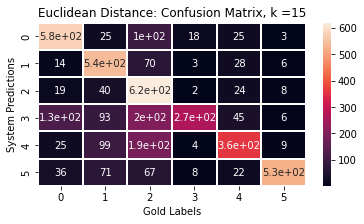

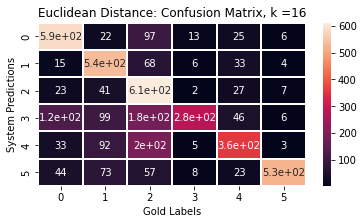

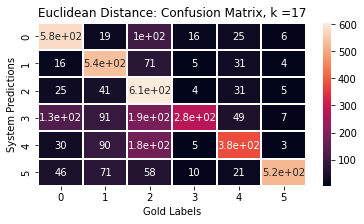

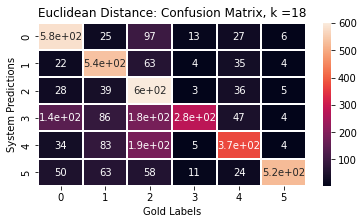

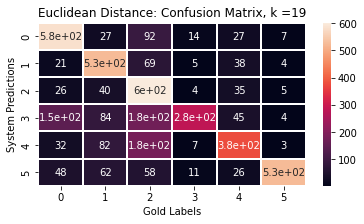

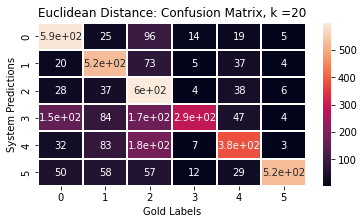

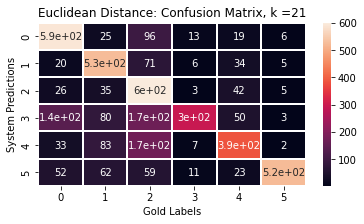

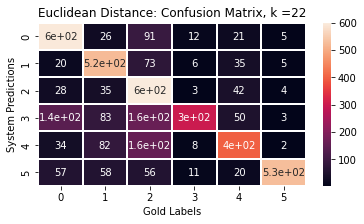

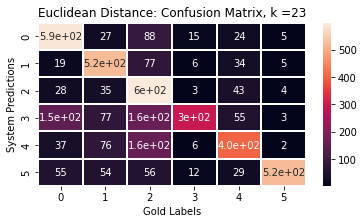

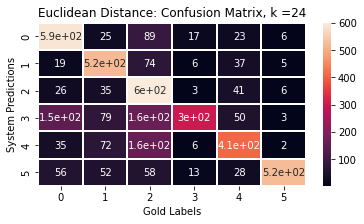

In [ ]:
for i in range(10):
  confusionE = confusion_matrix(train_y, predEuc_text[i]) 
  plt.figure(figsize=(6,3))
  heat_map = sns.heatmap(confusionE, linewidth = 1 , annot = True)
  st = "Euclidean Distance: Confusion Matrix, k =" +str(k_vals[i])
  plt.title( st)
  plt.ylabel('System Predictions')
  plt.xlabel('Gold Labels')
  plt.show()


In [ ]:
accuracyE = []
class_report = []
accs = []
for i in range(10):
  a = accuracy_score(train_y, predEuc_text[i])
  print("For k = ", str(k_vals[i]))
  print("accuracy: " , a) 
  accs.append(a)
  print(classification_report(train_y, predEuc_text[i]))

For k =  15
accuracy:  0.6758459743290548
              precision    recall  f1-score   support

      Forbes       0.72      0.77      0.75       751
  LilTunechi       0.62      0.82      0.71       664
      ManUtd       0.50      0.87      0.63       712
   NewYorker       0.88      0.36      0.51       741
      Twitch       0.71      0.52      0.61       686
ricky_martin       0.94      0.72      0.82       731

    accuracy                           0.68      4285
   macro avg       0.73      0.68      0.67      4285
weighted avg       0.73      0.68      0.67      4285

For k =  16
accuracy:  0.6774795799299883
              precision    recall  f1-score   support

      Forbes       0.71      0.78      0.75       751
  LilTunechi       0.62      0.81      0.70       664
      ManUtd       0.50      0.86      0.64       712
   NewYorker       0.89      0.38      0.53       741
      Twitch       0.70      0.52      0.60       686
ricky_martin       0.95      0.72      0.82     

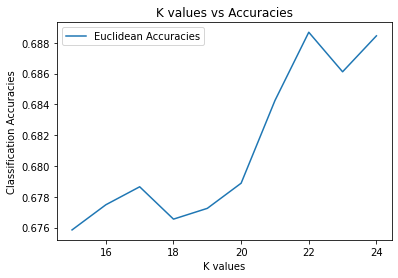

In [ ]:
# Classification Accuracies
# plotting euc points 
plt.plot(k_vals, accs, label = "Euclidean Accuracies")
  
plt.xlabel('K values')
plt.ylabel('Classification Accuracies')
plt.title('K values vs Accuracies')
plt.legend()
plt.show()

Accuracy:  0.7067879636109167


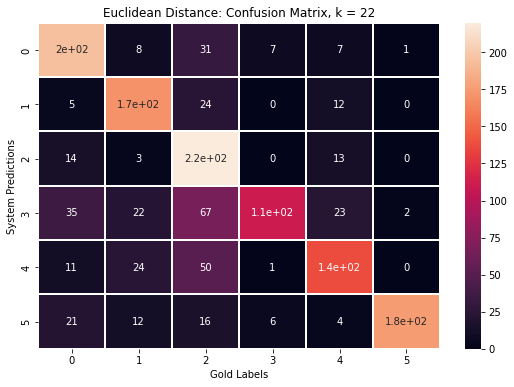

In [ ]:
# TESTING for k = 22; UPDATE: passing X_train instead of X_test -> doing so yields an accuracy of 60.6%
knnEuc = KNeighborsClassifier(n_neighbors=22, p = 2, metric = 'minkowski').fit(X_train_tfidf, train_y) #euclidean 
eucPred =knnEuc.predict(X_test_tfidf)

print("Accuracy: ", accuracy_score(test_y, eucPred))

confusionE = confusion_matrix(test_y, eucPred) 
confusionE
plt.figure(figsize=(9,6))
heat_map = sns.heatmap(confusionE, linewidth = 1 , annot = True)
st = "Euclidean Distance: Confusion Matrix, k = 22" 
plt.title( st)
plt.ylabel('System Predictions')
plt.xlabel('Gold Labels')
plt.show()

# Task 3: NNs

For embeddings as features

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
# [epochs, learning rate, hidden layers]
parameterCombos = [[200, 0.001, (200,)], [300, 0.0015,(50,100)],[400,0.001,(100,200)]]
nnPredictions = []

for i in range(len(parameterCombos)):
  clf = MLPClassifier(random_state=1, learning_rate_init = parameterCombos[i][1], max_iter=parameterCombos[i][0], hidden_layer_sizes=parameterCombos[i][2])
  nnPredictions.append(cross_val_predict(clf, embeddings, train_y, cv=5))

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

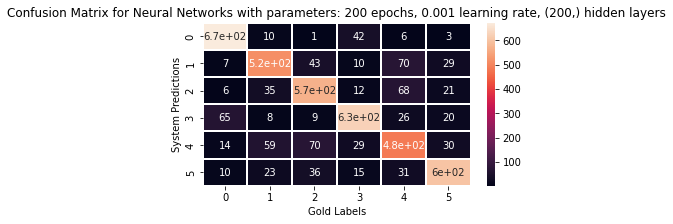

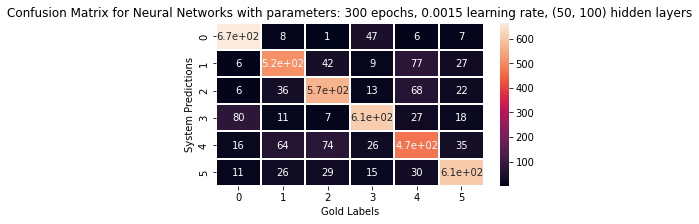

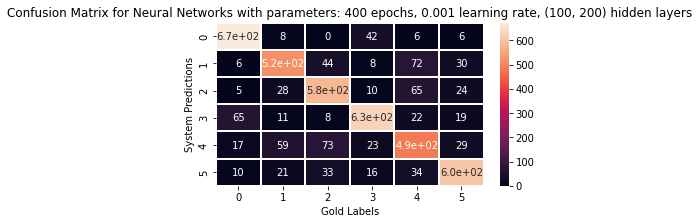

In [ ]:
for i in range(len(parameterCombos)):
  nnConfusion = confusion_matrix(train_y, nnPredictions[i]) 
  plt.figure(figsize=(6,3))
  heat_map = sns.heatmap(nnConfusion, linewidth = 1 , annot = True)
  st = "Confusion Matrix for Neural Networks with parameters: " + str(parameterCombos[i][0]) + " epochs, " + str(parameterCombos[i][1]) + " learning rate, " + str(parameterCombos[i][2]) + " hidden layers"
  plt.title(st)
  plt.ylabel('System Predictions')
  plt.xlabel('Gold Labels')
  plt.show()

In [ ]:
nnAcc1 = []
for i in range(len(parameterCombos)):
  a = accuracy_score(train_y, nnPredictions[i])
  print("Confusion Matrix for Neural Networks with parameters: " + str(parameterCombos[i][0]) + " epochs, " + str(parameterCombos[i][1]) + " learning rate, " + str(parameterCombos[i][2]) + " hidden layers")
  print("accuracy: " , a) 
  nnAcc1.append(a)
  print(classification_report(train_y, nnPredictions[i]))

Confusion Matrix for Neural Networks with parameters: 200 epochs, 0.001 learning rate, (200,) hidden layers
accuracy:  0.8114352392065344
              precision    recall  f1-score   support

      Forbes       0.87      0.92      0.89       735
  LilTunechi       0.79      0.76      0.78       676
      ManUtd       0.78      0.80      0.79       714
   NewYorker       0.85      0.83      0.84       754
      Twitch       0.71      0.71      0.71       687
ricky_martin       0.85      0.84      0.85       719

    accuracy                           0.81      4285
   macro avg       0.81      0.81      0.81      4285
weighted avg       0.81      0.81      0.81      4285

Confusion Matrix for Neural Networks with parameters: 300 epochs, 0.0015 learning rate, (50, 100) hidden layers
accuracy:  0.8030338389731622
              precision    recall  f1-score   support

      Forbes       0.85      0.91      0.88       735
  LilTunechi       0.78      0.76      0.77       676
      ManUtd  

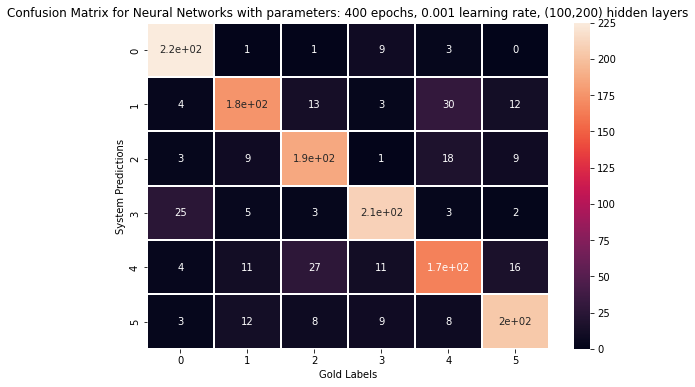

In [ ]:
# FOR TESTING WITH 400 epochs, 0.001 learning rate, (100,200) hidden layers
clf = MLPClassifier(random_state=1,  learning_rate_init = 0.001, max_iter=400, hidden_layer_sizes=(100,200)).fit(embeddings, train_y) 
nnPred =clf.predict(embeddingsTest)

confusionNN = confusion_matrix(test_y, nnPred) 
confusionNN
plt.figure(figsize=(9,6))
heat_map = sns.heatmap(confusionNN, linewidth = 1 , annot = True)

st = "Confusion Matrix for Neural Networks with parameters: 400 epochs, 0.001 learning rate, (100,200) hidden layers"
plt.title(st)
plt.ylabel('System Predictions')
plt.xlabel('Gold Labels')
plt.show()

In [ ]:
a = accuracy_score(test_y, nnPred)
print("Metrics for Neural Networks with parameters: 400 epochs, 0.001 learning rate, (100,200) hidden layers")
print("accuracy: " , a) 
print(classification_report(test_y, nnPred))

Metrics for Neural Networks with parameters: 400 epochs, 0.001 learning rate, (100,200) hidden layers
accuracy:  0.8159552134359692
              precision    recall  f1-score   support

      Forbes       0.85      0.94      0.89       239
  LilTunechi       0.82      0.74      0.78       237
      ManUtd       0.78      0.82      0.80       226
   NewYorker       0.86      0.85      0.86       248
      Twitch       0.73      0.71      0.72       235
ricky_martin       0.84      0.84      0.84       244

    accuracy                           0.82      1429
   macro avg       0.81      0.82      0.81      1429
weighted avg       0.82      0.82      0.81      1429



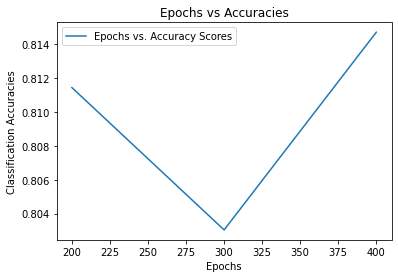

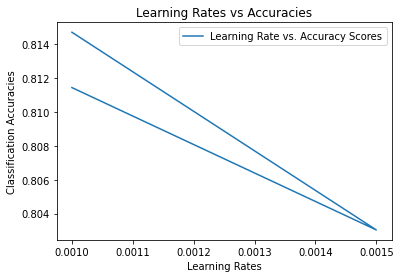

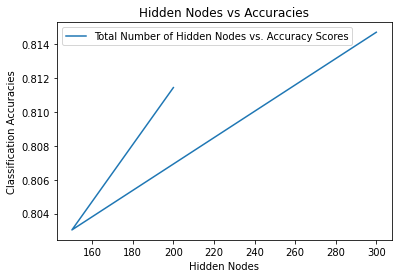

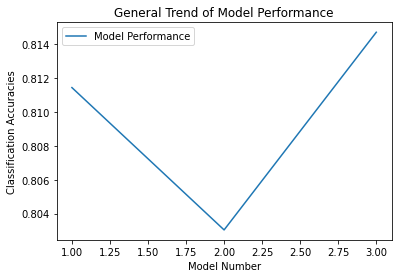

In [ ]:
# graphs
epochs = [parameterCombos[0][0], parameterCombos[1][0], parameterCombos[2][0]]
lrs = [parameterCombos[0][1], parameterCombos[1][1], parameterCombos[2][1]]
hlayers = [parameterCombos[0][2][0], parameterCombos[1][2][0] + parameterCombos[1][2][1], parameterCombos[2][2][0] + parameterCombos[2][2][1]]

# graph 1
plt.plot(epochs, nnAcc1, label = "Epochs vs. Accuracy Scores")
plt.xlabel('Epochs')
plt.ylabel('Classification Accuracies')
plt.title('Epochs vs Accuracies')
plt.legend()
plt.show()

# graph 2
plt.plot(lrs, nnAcc1, label = "Learning Rate vs. Accuracy Scores")
plt.xlabel('Learning Rates')
plt.ylabel('Classification Accuracies')
plt.title('Learning Rates vs Accuracies')
plt.legend()
plt.show()

# graph 3
plt.plot(hlayers, nnAcc1, label = "Total Number of Hidden Nodes vs. Accuracy Scores")
plt.xlabel('Hidden Nodes')
plt.ylabel('Classification Accuracies')
plt.title('Hidden Nodes vs Accuracies')
plt.legend()
plt.show()

# graph 4
model_num = [1, 2, 3]
plt.plot(model_num, nnAcc1, label = "Model Performance")
plt.xlabel('Model Number')
plt.ylabel('Classification Accuracies')
plt.title('General Trend of Model Performance')
plt.legend()
plt.show()

For BOW as features

In [ ]:
# [epochs, learning rate, hidden layers]
parameterCombos = [[200, 0.001, (200,)], [300, 0.0015,(50,100)],[400,0.001,(100,200)]]
nnPredictions_bow = []

for i in range(len(parameterCombos)):
  clf = MLPClassifier(random_state=1, learning_rate_init = parameterCombos[i][1], max_iter=parameterCombos[i][0], hidden_layer_sizes=parameterCombos[i][2])
  nnPredictions_bow.append(cross_val_predict(clf, X_train_tfidf, train_y, cv=5))

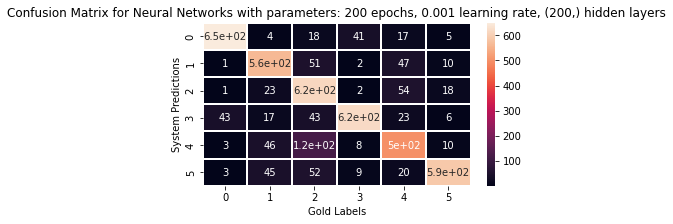

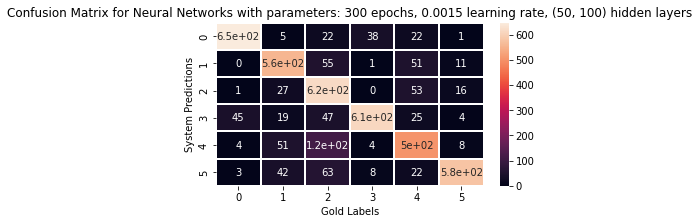

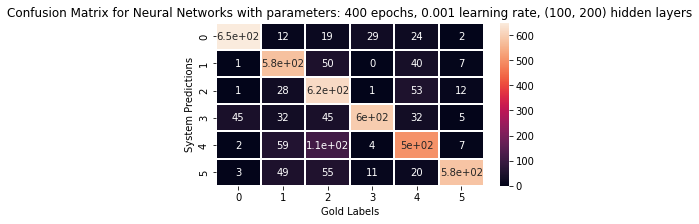

In [ ]:
for i in range(len(parameterCombos)):
  nnConfusion = confusion_matrix(train_y, nnPredictions_bow[i]) 
  plt.figure(figsize=(6,3))
  heat_map = sns.heatmap(nnConfusion, linewidth = 1 , annot = True)
  st = "Confusion Matrix for Neural Networks with parameters: " + str(parameterCombos[i][0]) + " epochs, " + str(parameterCombos[i][1]) + " learning rate, " + str(parameterCombos[i][2]) + " hidden layers"
  plt.title(st)
  plt.ylabel('System Predictions')
  plt.xlabel('Gold Labels')
  plt.show()

In [ ]:
nnAcc2 = []
for i in range(len(parameterCombos)):
  a = accuracy_score(train_y, nnPredictions_bow[i])
  print("Metrics for Neural Networks with parameters: " + str(parameterCombos[i][0]) + " epochs, " + str(parameterCombos[i][1]) + " learning rate, " + str(parameterCombos[i][2]) + " hidden layers")
  print("accuracy: " , a)
  nnAcc2.append(a)
  print(classification_report(train_y, nnPredictions_bow[i]))

Metrics for Neural Networks with parameters: 200 epochs, 0.001 learning rate, (200,) hidden layers
accuracy:  0.827071178529755
              precision    recall  f1-score   support

      Forbes       0.93      0.88      0.91       735
  LilTunechi       0.81      0.84      0.82       676
      ManUtd       0.69      0.86      0.76       714
   NewYorker       0.91      0.82      0.87       754
      Twitch       0.76      0.73      0.74       687
ricky_martin       0.92      0.82      0.87       719

    accuracy                           0.83      4285
   macro avg       0.83      0.83      0.83      4285
weighted avg       0.84      0.83      0.83      4285

Metrics for Neural Networks with parameters: 300 epochs, 0.0015 learning rate, (50, 100) hidden layers
accuracy:  0.8217036172695449
              precision    recall  f1-score   support

      Forbes       0.92      0.88      0.90       735
  LilTunechi       0.79      0.83      0.81       676
      ManUtd       0.67      0.86

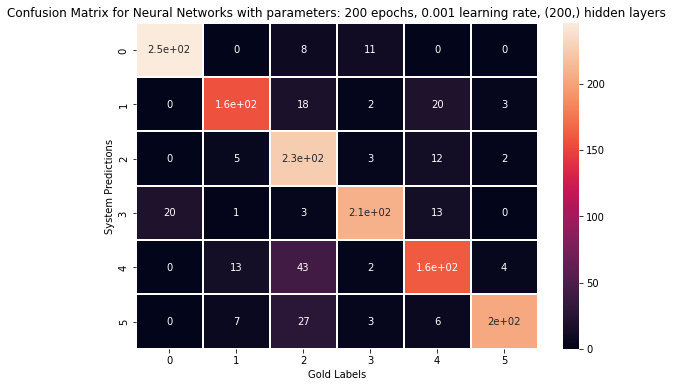

In [ ]:
clf = MLPClassifier(random_state=1,  learning_rate_init = 0.001, max_iter=200, hidden_layer_sizes=(200,)).fit(X_train_tfidf, train_y) 
nnPred_bow =clf.predict(X_test_tfidf)

confusionNN = confusion_matrix(test_y, nnPred_bow) 
confusionNN
plt.figure(figsize=(9,6))
heat_map = sns.heatmap(confusionNN, linewidth = 1 , annot = True)

st = "Confusion Matrix for Neural Networks with parameters: 200 epochs, 0.001 learning rate, (200,) hidden layers"
plt.title(st)
plt.ylabel('System Predictions')
plt.xlabel('Gold Labels')
plt.show()

In [ ]:
a = accuracy_score(test_y, nnPred_bow)
print("Metrics for Neural Networks with parameters: 200 epochs, 0.001 learning rate, (200,) hidden layers")
print("accuracy: " , a)
print(classification_report(test_y, nnPred_bow))

Metrics for Neural Networks with parameters: 200 epochs, 0.001 learning rate, (200,) hidden layers
accuracy:  0.8418474457662701
              precision    recall  f1-score   support

      Forbes       0.92      0.93      0.93       265
  LilTunechi       0.86      0.79      0.82       200
      ManUtd       0.70      0.91      0.79       248
   NewYorker       0.91      0.85      0.88       246
      Twitch       0.76      0.72      0.74       223
ricky_martin       0.96      0.83      0.89       247

    accuracy                           0.84      1429
   macro avg       0.85      0.84      0.84      1429
weighted avg       0.85      0.84      0.84      1429



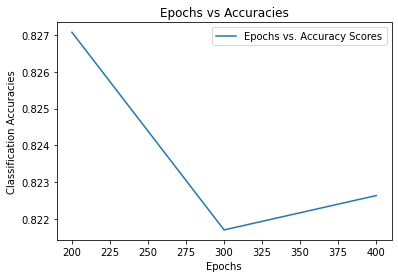

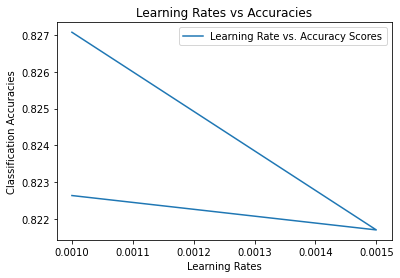

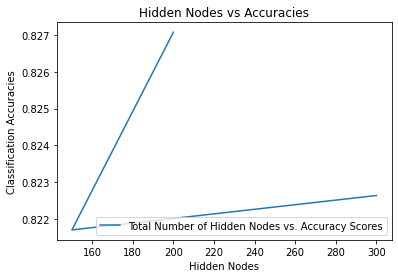

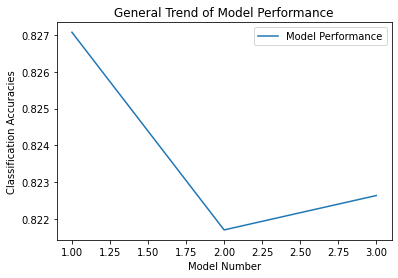

In [ ]:
# graphs
epochs = [parameterCombos[0][0], parameterCombos[1][0], parameterCombos[2][0]]
lrs = [parameterCombos[0][1], parameterCombos[1][1], parameterCombos[2][1]]
hlayers = [parameterCombos[0][2][0], parameterCombos[1][2][0] + parameterCombos[1][2][1], parameterCombos[2][2][0] + parameterCombos[2][2][1]]

# graph 1
plt.plot(epochs, nnAcc2, label = "Epochs vs. Accuracy Scores")
plt.xlabel('Epochs')
plt.ylabel('Classification Accuracies')
plt.title('Epochs vs Accuracies')
plt.legend()
plt.show()

# graph 2
plt.plot(lrs, nnAcc2, label = "Learning Rate vs. Accuracy Scores")
plt.xlabel('Learning Rates')
plt.ylabel('Classification Accuracies')
plt.title('Learning Rates vs Accuracies')
plt.legend()
plt.show()

# graph 3
plt.plot(hlayers, nnAcc2, label = "Total Number of Hidden Nodes vs. Accuracy Scores")
plt.xlabel('Hidden Nodes')
plt.ylabel('Classification Accuracies')
plt.title('Hidden Nodes vs Accuracies')
plt.legend()
plt.show()

# graph 4
model_num = [1, 2, 3]
plt.plot(model_num, nnAcc2, label = "Model Performance")
plt.xlabel('Model Number')
plt.ylabel('Classification Accuracies')
plt.title('General Trend of Model Performance')
plt.legend()
plt.show()

# Task 4: Ensemble Methods

For embeddings as features

In [ ]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# checking the accuracy for three kinds of ensemble methods: bagging, boosting & voting -> picking the one which gives the highest accuracy
# bagging
clf = BaggingClassifier(base_estimator=SVC()).fit(embeddings, train_y)
bagging_preds = clf.predict(embeddingsTest)
bagging_acc = accuracy_score(test_y, bagging_preds)
print(bagging_acc)


0.8551434569629112


In [ ]:
# boosting
clf = RandomForestClassifier(max_depth=15, criterion="entropy", random_state=0).fit(embeddings, train_y)
boost_preds = clf.predict(embeddingsTest)
boost_acc = accuracy_score(test_y, boost_preds)
print(boost_acc)

0.7977606717984604


In [ ]:
# voting
estimator = []
estimator.append(('LR', LogisticRegression(solver ='lbfgs', multi_class ='multinomial', max_iter = 100)))
estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
estimator.append(('DTC', DecisionTreeClassifier()))
  
clf = VotingClassifier(estimators = estimator, voting ='soft').fit(embeddings, train_y)
vot_pred = clf.predict(embeddingsTest)
print(accuracy_score(test_y, vot_pred))

0.7095871238628412


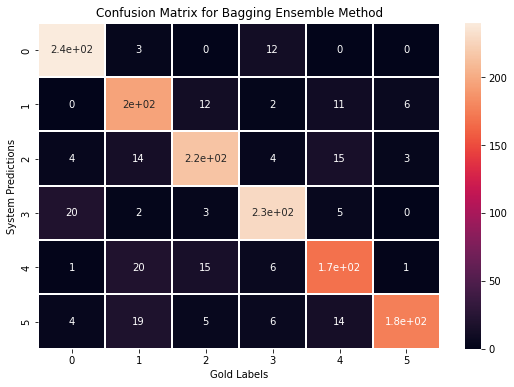

Metrics for Bagging Ensemble Method
              precision    recall  f1-score   support

      Forbes       0.89      0.94      0.92       255
  LilTunechi       0.77      0.86      0.81       226
      ManUtd       0.86      0.84      0.85       255
   NewYorker       0.88      0.88      0.88       258
      Twitch       0.79      0.80      0.79       211
ricky_martin       0.95      0.79      0.86       224

    accuracy                           0.86      1429
   macro avg       0.86      0.85      0.85      1429
weighted avg       0.86      0.86      0.86      1429



In [ ]:
# choosing bagging classifier since it gives highest accuracy
confusionBagging = confusion_matrix(test_y, bagging_preds) 
confusionBagging
plt.figure(figsize=(9,6))
heat_map = sns.heatmap(confusionBagging, linewidth = 1 , annot = True)

st = "Confusion Matrix for Bagging Ensemble Method"
plt.title(st)
plt.ylabel('System Predictions')
plt.xlabel('Gold Labels')
plt.show()

print("Metrics for Bagging Ensemble Method")
print(classification_report(test_y, bagging_preds))

For BOW as features

In [ ]:
# checking the accuracy for three kinds of ensemble methods: bagging, boosting & voting -> picking the one which gives the highest accuracy
# bagging
clf = BaggingClassifier(base_estimator=SVC()).fit(X_train_tfidf, train_y)
bagging_preds = clf.predict(X_test_tfidf)
bagging_acc = accuracy_score(test_y, bagging_preds)
print(bagging_acc)


0.8453463960811757


In [ ]:
# boosting
clf = RandomForestClassifier(max_depth=15, criterion="entropy", random_state=0).fit(X_train_tfidf, train_y)
boost_preds = clf.predict(X_test_tfidf)
boost_acc = accuracy_score(test_y, boost_preds)
print(boost_acc)

0.6941917424772568


In [ ]:
# voting
estimator = []
estimator.append(('LR', LogisticRegression(solver ='lbfgs', multi_class ='multinomial', max_iter = 100)))
estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
estimator.append(('DTC', DecisionTreeClassifier()))
  
clf = VotingClassifier(estimators = estimator, voting ='soft').fit(X_train_tfidf, train_y)
vot_pred = clf.predict(X_test_tfidf)
print(accuracy_score(test_y, vot_pred))

0.7228831350594822


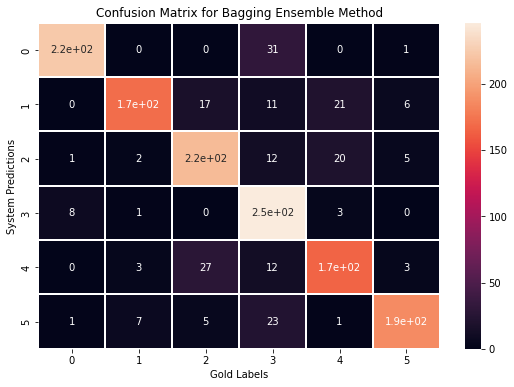

Metrics for Bagging Ensemble Method
              precision    recall  f1-score   support

      Forbes       0.96      0.87      0.91       255
  LilTunechi       0.93      0.76      0.83       226
      ManUtd       0.81      0.84      0.83       255
   NewYorker       0.73      0.95      0.83       258
      Twitch       0.79      0.79      0.79       211
ricky_martin       0.93      0.83      0.88       224

    accuracy                           0.85      1429
   macro avg       0.86      0.84      0.85      1429
weighted avg       0.86      0.85      0.85      1429



In [ ]:
# choosing bagging classifier since it gives highest accuracy
confusionBagging = confusion_matrix(test_y, bagging_preds) 
confusionBagging
plt.figure(figsize=(9,6))
heat_map = sns.heatmap(confusionBagging, linewidth = 1 , annot = True)

st = "Confusion Matrix for Bagging Ensemble Method"
plt.title(st)
plt.ylabel('System Predictions')
plt.xlabel('Gold Labels')
plt.show()

print("Metrics for Bagging Ensemble Method")
print(classification_report(test_y, bagging_preds))

# Task 5: Theoretical Understanding

**Q1: Which model performed best and why do you think that is?**

The following accuracies were observed for each model:

1. KNN: 81.1% (Embeddings) and 60.7% (BOW)
2. Neural Networks: 81.6% (Embeddings) and 84% (BOW)
3. Bagging Ensemble Methods: 86% (Embeddings) and 85% (BOW)

Ensemble methods performed the best out of all the three for both embeddings and bag-of-words features. This is because bagging has a variance reduction mechanism (that is, it reduces the variance of the error) and thus, increases the accuracy. It does this by combining several estimates from different models and aggregating them. In general, the primary use of ensemble methods is to improve the predicted performance of a model.

**Q2: Which features gave better results for each model? Explain.**

Embeddings performed better for all models except Neural Networks, where bag-of-words features gave a higher accuracy. Embeddings take into account semantics and context behind words in text as opposed to BOW which treats vocabulary only as frequency counts without any sequence or meaning.  

**Q3: What effect would increasing the classes to 150 have?**

Increasing the classes will decrease the accuracy for each model. This is because there is a lower chance that any one category will be distinct from the others and there may be greater overlap between tweets from different IDs (since the vocabulary may not change by alot). Currently, there are only 4 classes and so, differentiating between them is (relatively) easy. 

**Q4: Suggest improvements to text preparation, feature extraction, and models that can be made to perform this task better.**
1. Different combinations of classifiers could be tested for Voting Classifier to get more convincing results. For instance, we did not test our dataset on the Naive Bayes Classifier. Experimenting with a unique combination of classifiers could produce better accuracies.
2. More data: Increasing the number of tweets for each author will help create a better classifier.
3. To achieve higher accuracy scores, similar data preprocessing steps could be ensured across all group members in order to enhance consistency
4. Tweet length: Tweets can only have 140 characters which greatly limits the words a user can write. During preprocessing, removing stop words and other characters further reduces words and affects model's accuracy. 
5. Class imbalance: after preprocessing, some tweets reduce to a blank string, which means that the number of usable tweets is lowered. Increasing the number of tweets could improve class balance ratio, or if more than enough data is gathered, we can prune in a way that balance is preserved. 

**Q5: What - in your understanding - are the applications of authorship attribution?**

Authorship attribution can be used in the following main scenarios:

1. Plagiarism detection, especially in the research/scientific community
2. Identification of historical texts whose origin is unknown
3. Criminal investigations
4. Helps prevent Literary Forgery i.e. writing literary work which is deliberately misattributed to a historical or invented author. Such effort can discourage content theft for financial gains. 